# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Fabian Aulia Permana
- **Email:** Permana.aulia00@gmail.com
- **ID Dicoding:** kampfkatzen

## Menentukan Pertanyaan Bisnis

- Pada kondisi cuaca dan musim apa sepeda terpinjam paling banyak dan paling sedikit?
- Bagaimana performa peminjaman casual dan registered pada bulan september 2011?

## Import Semua Packages/Library yang Digunakan

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

##### load day dataset

In [107]:
day = pd.read_csv('data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### load hour dataset

In [109]:
hour = pd.read_csv('data/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### List kolom:

1. instant: indeks
2. dteday : tanggal peminjaman sepeda
3. season : 1 adalah musim dingin, 2 adalah musim semi, 3 adalah musim panas, dan 4 adalah musim gugur pada peminjaman sepeda
4. yr : 0 adalah 2011, 1 adalah 2012
5. mnth : bulan, dari ke-1 sampai ke-12
6. hr : jam, dari ke-0 sampai ke-23
7. holiday :  indikator hari libur, jika hari libur maka nilainya 1, jika tidak maka nilainya 0
8. weekday : hari pada satu pekan
9. workingday : indikator hari kerja, jika hari kerja maka nilainya 1, jika tidak maka nilainya 0
10. weathersit : situasi cuaca peminjaman sepeda dilakukan. 1 adalah Cerah, 2 adalah Mendung, 3 adalah Hujan atau bersalju ringan, 4 adalah Hujan Lebat
11. temp : suhu dalam derajat Celsius pada saat peminjaman sepeda dilakukan
12. atemp: suhu yang dirasakan dalam derajat Celsius pada saat peminjaman sepeda dilakukan
13. hum: Kelembapan
14. windspeed: Kecepatan angin
15. casual: jumlah peminjam sepeda biasa
16. registered: jumlah peminjam sepeda yang terdaftar member
17. cnt: total jumlah peminjam sepeda, campuran dari jumlah casual dan registered

### Assessing Data

##### day dataframe

mengecek shape pada data day

In [115]:
rows, columns = day.shape
print(f'Rows: {rows}, Columns: {columns}')

Rows: 731, Columns: 16


mengecek informasi pada data day

In [117]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


pada data day, terdapat kesalahan tipe data pada kolom dteday

mengecek missing value pada data day

In [120]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

pada data day, tidak ada missing value di semua kolom

mengecek duplikasi data pada data day

In [123]:
day.duplicated().sum()

0

pada data day, tidak ada data duplikat

mengecek jumlah data unik pada setiap field data day

In [126]:
day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

mengecek nilai statistik deskriptif (count, mean, standard deviation, min, interquartil 1/2/3, dan max) pada data day

In [128]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### hour dataframe

mengecek shape pada data hour

In [131]:
rows, columns = hour.shape
print(f'Rows: {rows}, Columns: {columns}')

Rows: 17379, Columns: 17


mengecek informasi pada data hour

In [133]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


pada data hour, terdapat kesalahan tipe data pada kolom dteday

mengecek missing value pada data hour

In [136]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

pada data hour, tidak ada missing value di semua kolom

mengecek data duplikat pada data hour

In [139]:
hour.duplicated().sum()

0

pada data hour, tidak ada data duplikat

mengecek jumlah data unik pada data hour

In [142]:
hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

mengecek nilai statistik deskriptif dari data hour

In [144]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Data assessment:

- Kesalahan tipe data pada kolom dteday di data hour dan data day

### Cleaning Data

#### Handling data type error

##### day data

In [150]:
day['dteday'] = pd.to_datetime(day['dteday'])
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### hour data

In [152]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Cleaning result:

- data type kolom dteday pada data day dan data hour berubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore data day dan data hour

##### Mencari count, mean, min, interquartil 1/2/3, max, dan standard deviation pada data day

In [158]:
day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


##### Mencari count, mean, min, interquartil 1/2/3, max, dan standard deviation pada data hour

In [160]:
hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


##### Mencari max, min, mean, dan standard deviation pada count peminjaman berdasarkan situasi cuaca

In [162]:
hour.groupby(by='weathersit').agg({'dteday': 'nunique','cnt': ['max', 'min', 'mean', 'std']
})

dteday  cnt                            
           nunique  max min        mean         std
weathersit                                         
1              700  977   1  204.869272  189.487773
2              567  957   1  175.165493  165.431589
3              300  891   1  111.579281  133.781045
4                3  164  23   74.333333   77.925178

##### Mencari max, min, mean, dan standard deviation pada count peminjaman berdasarkan musim

In [164]:
hour.groupby(by='season').agg({'dteday': 'nunique','cnt': ['max', 'min', 'mean', 'std']})

dteday  cnt                            
       nunique  max min        mean         std
season                                         
1          181  801   1  111.114569  119.224010
2          184  957   1  208.344069  188.362473
3          188  977   1  236.016237  197.711630
4          178  967   1  198.868856  182.967972

##### Mencari max, min, mean, dan standard deviation pada count peminjaman berdasarkan jam pada hari

In [166]:
hour.groupby(by='hr').agg({'dteday': 'nunique', 'cnt': ['min', 'max', 'mean','std']})

dteday cnt                             
   nunique min  max        mean         std
hr                                         
0      726   2  283   53.898072   42.307910
1      724   1  168   33.375691   33.538727
2      715   1  132   22.869930   26.578642
3      697   1   79   11.727403   13.239190
4      697   1   28    6.352941    4.143818
5      717   1   66   19.889819   13.200765
6      725   1  213   76.044138   55.084348
7      727   1  596  212.064649  161.441936
8      727   5  839  359.011004  235.189285
9      727  14  426  219.309491   93.703458
10     727   8  539  173.668501  102.205413
11     727  10  663  208.143054  127.495536
12     728   3  776  253.315934  145.081134
13     729  11  760  253.661180  148.107657
14     729  12  750  240.949246  147.271574
15     729   7  750  251.233196  144.632541
16     730  11  783  311.983562  148.682618
17     730  15  976  461.452055  232.656611
18     728  23  977  425.510989  224.639304
19     728  11  743  311.523352  161.050359
20     728  11  567  226.030220  119.670164
21     728   6  584  172.314560   89.788893
22     728   9  502  131.335165   69.937782
23     728   2  256   87.831044   50.846889

##### Mengecek tren peminjaman sepeda berdasarkan jam

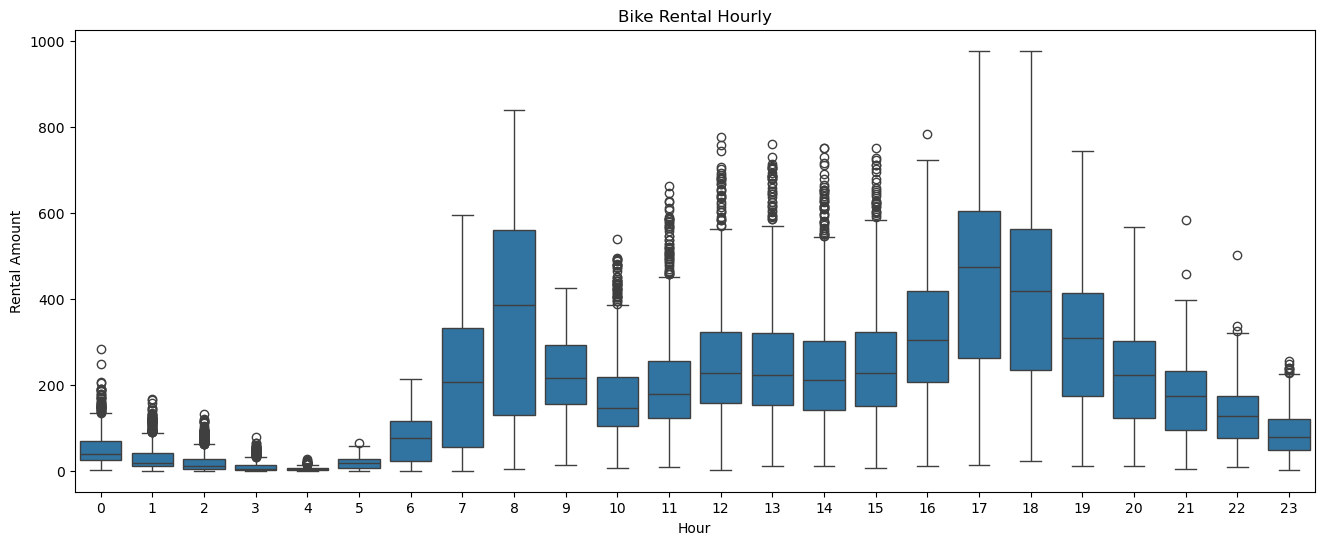

In [168]:
plt.figure(figsize=(16, 6))

sns.boxplot(
    x="hr",
    y="cnt",
    data=hour
)

plt.title("Bike Rental Hourly")
plt.xlabel("Hour")
plt.ylabel("Rental Amount")

plt.show()

##### mengecek distribusi data peminjaman casual dan registered di data hour

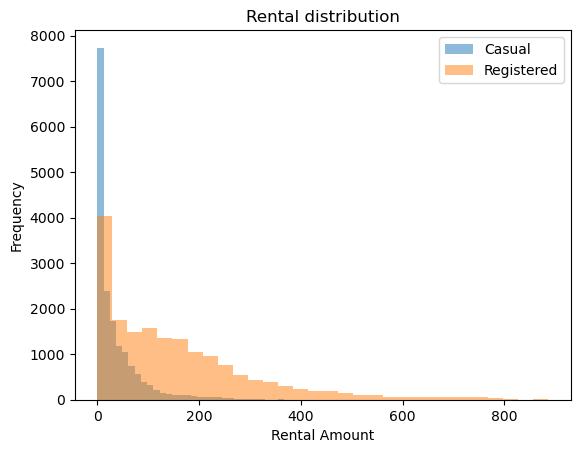

In [170]:
plt.hist(hour['casual'], bins=30, alpha=0.5, label='Casual')
plt.hist(hour['registered'], bins=30, alpha=0.5, label='Registered')

plt.title("Rental distribution")
plt.xlabel("Rental Amount")
plt.ylabel("Frequency")
plt.legend()

plt.show()

##### Mengecek tren peminjaman berdasarkan tanggal

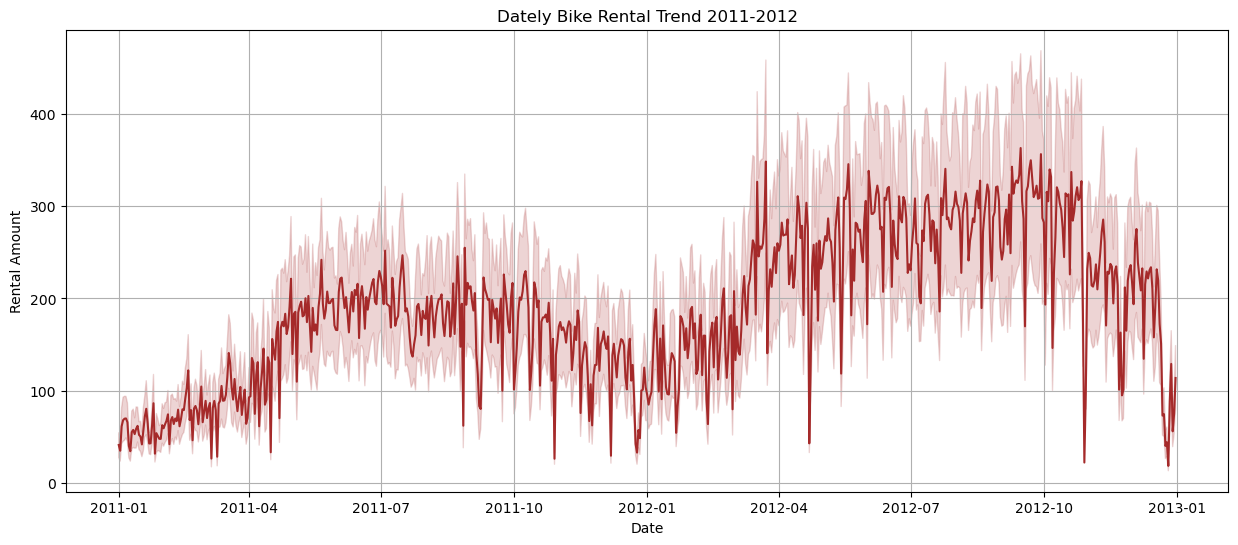

In [172]:
plt.figure(figsize=(15, 6))

sns.lineplot(x="dteday", y="cnt", data=hour, color='brown')
plt.title("Dately Bike Rental Trend 2011-2012")
plt.xlabel("Date")
plt.ylabel("Rental Amount")
plt.grid(True)

plt.show()

##### Mengecek korelasi variabel-variabel di data hour

In [174]:
hour.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


heatmap korelasi variabel-variable data hour

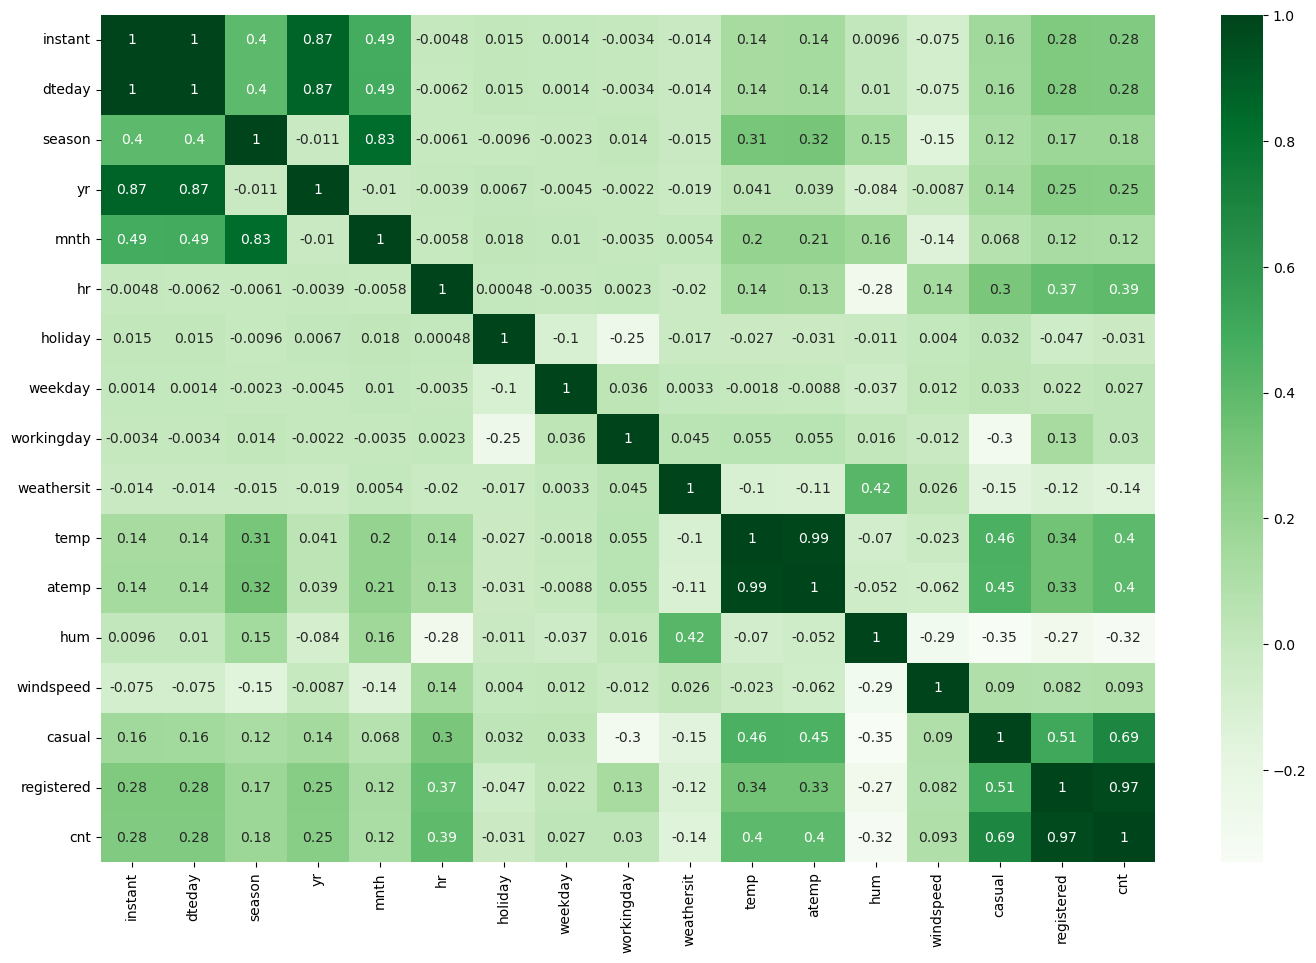

In [176]:
plt.figure(figsize=(17, 11))
sns.heatmap(hour.corr(), annot=True, cmap='Greens')
plt.show()

barplot korelasi variabel-variabel data hour

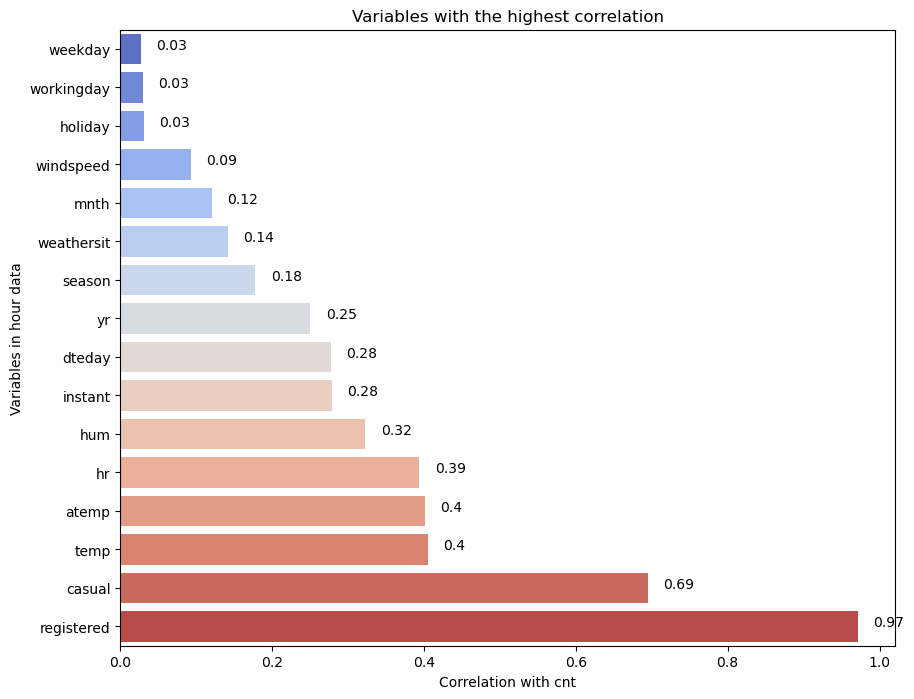

In [178]:
correlation = hour.corr()['cnt'].drop('cnt')
correlation_sorted = correlation.abs().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
sns.barplot(
    x=correlation_sorted.values, 
    y=correlation_sorted.index, 
    hue=correlation_sorted.index,
    palette='coolwarm', 
    legend=False,
    orient='h'
)
plt.title('Variables with the highest correlation')
plt.xlabel('Correlation with cnt')
plt.ylabel('Variables in hour data')
for i, v in enumerate(correlation_sorted.values):
    plt.text(v + 0.02, i, str(round(v, 2)))

plt.show()

### Insights peminjaman sepeda:

- Jumlah sepeda terpinjam paling sedikit dalam *sehari* adalah **22** dan terbanyak adalah  **8714**
- Jumlah sepeda terpinjam paling sedikit dalam *sejam* adalah **1** dan terbanyak adalah **977**
- mean dari jumlah sepeda terpinjam paling banyak dalam *sejam* ada pada saat **musim gugur** dan paling sedikit pada saat **musim semi**
- mean dari jumlah sepeda terpinjam paling banyak dalam *sejam* ada pada saat **cuaca cerah** dan paling sedikit pada saat **cuaca mendung, hujan/bersalju ringan, dan hujan lebat.**
- Peminjaman sepeda di malam hari dari pukul **18** sampai pukul **4** semakin menurun menjadi sedikit
- Peminjaman sepeda di pagi hari meningkat dari pukul **5** terutama puncaknya pukul **8**
- Sebagian besar frekuensi peminjaman casual dan registered berjumlah rendah

## Visualization & Explanatory Analysis

Konversi data main yang berisikan salinan dari data hour ke format baru untuk visualisasi data

In [183]:
main_data = hour.copy()
weathersit = {1:'Clear', 2: 'Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain'}
season = {1:'Spring', 2: 'Summer', 3:'Autumn', 4:'Winter'}
yr = {0: '2011', 1: '2012'}
mnth = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
#mapping
main_data['weathersit'] = main_data['weathersit'].map(weathersit)
main_data['season'] = main_data['season'].map(season)
main_data['mnth'] = main_data['mnth'].map(mnth)
main_data['weekday'] = main_data['dteday'].dt.day_name()
main_data['yr'] = main_data['yr'].map(yr)

main_data = main_data[['dteday', 'yr', 'mnth', 'hr', 'weekday', 'season', 'weathersit','cnt', 'registered', 'casual']]

main_data.head()

,dteday,yr,mnth,hr,weekday,season,weathersit,cnt,registered,casual
0,2011-01-01,2011,January,0,Saturday,Spring,Clear,16,13,3
1,2011-01-01,2011,January,1,Saturday,Spring,Clear,40,32,8
2,2011-01-01,2011,January,2,Saturday,Spring,Clear,32,27,5
3,2011-01-01,2011,January,3,Saturday,Spring,Clear,13,10,3
4,2011-01-01,2011,January,4,Saturday,Spring,Clear,1,1,0


Mengecek shape main_data untuk memastikan sama dengan data hour 

In [185]:
rows, columns = main_data.shape
print(f'Rows: {rows}, Columns: {columns}')

Rows: 17379, Columns: 10


### Pertanyaan 1:

##### Pada kondisi cuaca dan musim apa sepeda terpinjam paling banyak dan paling sedikit?

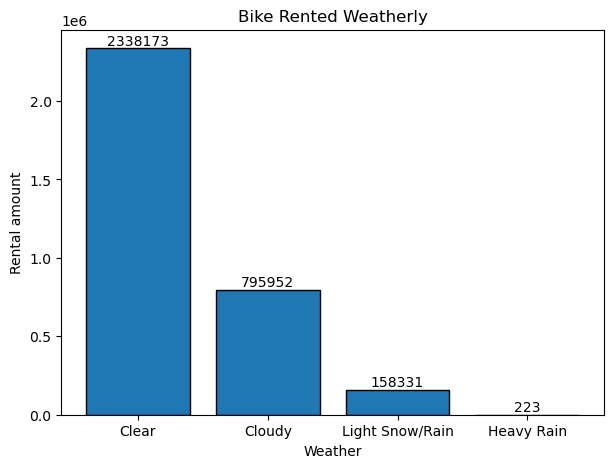

In [188]:
weathery_amounts = main_data.groupby('weathersit').cnt.sum().sort_values(ascending=False)
sizes = weathery_amounts.values
labels = weathery_amounts.index

plt.figure(figsize=(7, 5))
plt.bar(labels, sizes, edgecolor='black')

plt.title('Bike Rented Weatherly')
plt.xlabel('Weather')
plt.ylabel('Rental amount')
for i, value in enumerate(sizes):
    plt.text(i, value + 500, str(value), ha='center', va='bottom')
plt.show()

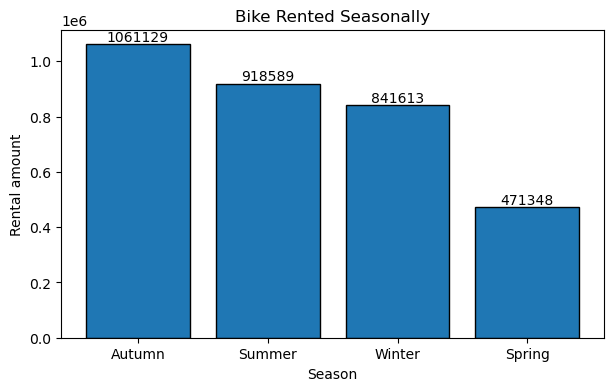

In [189]:
seasonal_amounts = main_data.groupby('season').cnt.sum().sort_values(ascending=False)
sizes = seasonal_amounts.values
labels = seasonal_amounts.index

plt.figure(figsize=(7, 4))
plt.bar(labels, sizes, edgecolor='black')

plt.title('Bike Rented Seasonally')
plt.xlabel('Season')
plt.ylabel('Rental amount')
for i, value in enumerate(sizes):
    plt.text(i, value + 500, str(value), ha='center', va='bottom')
plt.show()

### Pertanyaan 2:

##### Bagaimana peminjaman casual dan registered pada bulan september 2011?

Mengecek min, max, mean dan standard deviation dari peminjaman berdasarkan tanggal di bulan september 2011

In [193]:
main_sept = main_data[(main_data['yr'] == '2011') & (main_data['mnth'] == 'September')]
main_sept.groupby(by='dteday').agg({'cnt': ['min', 'max', 'mean','std']})

cnt                             
           min  max        mean         std
dteday                                     
2011-09-01   7  628  213.125000  172.455744
2011-09-02   4  456  196.958333  141.158400
2011-09-03   7  388  186.833333  134.192162
2011-09-04   3  435  205.833333  152.101415
2011-09-05   6  389  139.625000  124.662959
2011-09-06   1  373  117.826087  113.082292
2011-09-07   2  328   83.166667   98.144378
2011-09-08   2  195   80.086957   56.144224
2011-09-09   2  505  147.666667  137.739725
2011-09-10   6  480  222.708333  158.041678
2011-09-11   9  483  210.250000  156.828694
2011-09-12   2  590  204.913043  169.838135
2011-09-13   2  579  198.458333  166.207565
2011-09-14   5  599  199.375000  170.605778
2011-09-15   5  391  152.458333  105.767168
2011-09-16   4  566  198.333333  151.335121
2011-09-17   5  372  187.958333  129.716909
2011-09-18   1  376  178.083333  134.256703
2011-09-19   5  568  189.125000  160.880002
2011-09-20   3  511  151.708333  148.572477
2011-09-21   6  536  181.333333  144.788201
2011-09-22   2  563  199.791667  162.424559
2011-09-23   8  317   99.791667   90.582165
2011-09-24   5  460  225.958333  163.842310
2011-09-25   3  464  208.750000  153.038856
2011-09-26   5  570  192.916667  160.213965
2011-09-27   8  530  171.666667  136.915609
2011-09-28   3  591  162.791667  154.638985
2011-09-29   2  589  201.625000  166.990448
2011-09-30   3  591  216.750000  161.349270

Mengecek tren peminjaman casual dan registered pada bulan september 2011

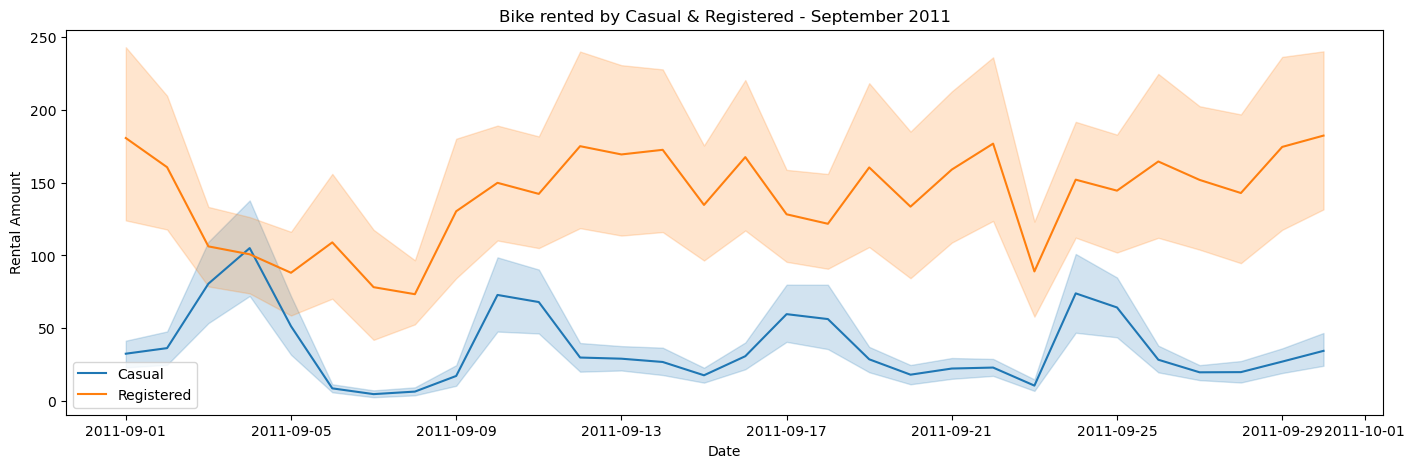

In [195]:
plt.figure(figsize=(17,5))
sns.lineplot(data=main_sept, x='dteday', y='casual', label='Casual')
sns.lineplot(data=main_sept, x='dteday', y='registered', label='Registered')
plt.title("Bike rented by Casual & Registered - September 2011")
plt.xlabel("Date")
plt.ylabel("Rental Amount")
plt.show()

Filter main_sept untuk mendapatkan total peminjaman casual dan registered pada bulan september 2011

In [197]:
registered, casual = main_sept[['registered', 'casual']].sum()
print('Total peminjaman registered pada bulan september 2011: ', registered)
print('Total peminjaman casual pada bulan september 2011: ', casual)

Total peminjaman registered pada bulan september 2011:  100873
Total peminjaman casual pada bulan september 2011:  26545


## Conclusion

- **Cuara cerah** adalah kondisi cuaca dengan jumlah peminjaman tertinggi dibanding kondisi cuaca lainnya selama 2 tahun
- **Musim gugur** menjadi musim dengan peminjaman sepeda tertinggi diantara musim lainnya selama 2 tahun
- Pada bulan september 2011, peminjaman registered berjumlah **100873**, dan peminjaman casual berjumlah: **26545**
- Peminjaman sepeda di malam hari dari pukul **18** sampai pukul **4** semakin menurun menjadi sedikit
- Peminjaman sepeda di pagi hari meningkat dari pukul **5** terutama puncaknya pukul **8**
- Sebagian besar frekuensi peminjaman casual dan registered berjumlah rendah

In [200]:
main_data.to_csv("dashboard/main_data.csv", index=False)